In [ ]:
# Import necessary libraries
import numpy as np # for numerical operations and arrays
import pandas as pd # for data manipulation and analysis
from sklearn.feature_extraction.text import CountVectorizer # for Text vectorization
from sklearn.model_selection import train_test_split # Train/test split for model evaluation
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes classifier
from sklearn.metrics import confusion_matrix # Confusion matrix for model evaluation
import seaborn as sns # for statistical data visualization
import matplotlib.pyplot as plt # for plotting
from google.colab import files

This line reads the Spam data from a CSV file named "spam.csv" and stores it in a pandas DataFrame called spam_db.

In [ ]:
# Load the dataset
spam_db = pd.read_csv("spam.csv")

In [ ]:
# display data
spam_db

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...



This line groups the spam_db by the 'Label' column, which contains labels indicating whether an email is spam or ham. It then computes summary statistics for each group using the describe() function.

In [ ]:
# Analyze the dataset by grouping it based on labels
spam_db.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    641  Please call our customer service representativ...    4

Creates new column called 'is_spam'. It assigns the value 1 to this column for rows where the 'Label' column is 'spam', and 0 for rows where the 'Label' column is 'ham'.

In [ ]:
# Create a binary column 'is_spam' to indicate spam (1) or not spam (0)
spam_db['is_spam'] =  spam_db['Label'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
# Display the updated dataset
spam_db

,Label,Message,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


This line splits the training and testing data. The x variable will store the  the feature data for the training and testing sets, respectively.

The Y variable will store the corresponding labels (1 for spam, 0 for not spam) for the training and testing sets.

spam_db.Message is the feature data representing the messages.

spam_db.is_spam  is the target variable indicating whether each email is spam or not.

test_size=0.25 indicates that 25% of data will be used for testing and remaning 75% will be used for traning.

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(spam_db.Message, spam_db.is_spam, test_size=0.25)

In [ ]:
# display the training set
x_train

4932    Good morning, my boytoy! How's those yummy lip...
3727                       No chikku nt yet.. Ya i'm free
693     My sister in law, hope you are having a great ...
1497    I'm always on yahoo messenger now. Just send t...
2098         Are you the cutest girl in the world or what
                              ...                        
2609                            Hello madam how are you ?
1690                              Bring tat cd don forget
92      Smile in Pleasure Smile in Pain Smile when tro...
5342    u r subscribed 2 TEXTCOMP 250 wkly comp. 1st w...
970     It wont b until 2.15 as trying 2 sort house ou...
Name: Message, Length: 4179, dtype: object

This line provides statistical information about the training set's feature data

In [ ]:
# Examine statistical information about the training set
x_train.describe()

count                       4179
unique                      3932
top       Sorry, I'll call later
freq                          22
Name: Message, dtype: object

This vectorizer function converts all the messages and text into a word count.

.fit_transform will convert it into a matrix and assign it to x_train_count

This allows us to know how frequently each of these words show up.

In [ ]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
# Store word count data as a matrix
x_train_count = vectorizer.fit_transform(x_train.values)

In [ ]:
# Display the transformed data
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

We create a Multinomial Naive Bayes classifier

and then the classifier is trained using the training data.

x_train_count is the numerical representation of messages obtained using CountVectorizer, and y_train is the corresponding binary label indicating whether each email is spam or not.

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
# Train the classifier using the training data
classifier.fit(x_train_count, y_train)

MultinomialNB()

we convert Test data to word count again using vectorizer using just transform function.

We use .score to figure out how well our model does.

In [ ]:
# Calculate and print the accuracy of the classifier based on the test data
x_test_count = vectorizer.transform(x_test)
accuracy = classifier.score(x_test_count, y_test)
print(f"Accuracy: {accuracy:f}")

Accuracy: 0.984925


The trained model predicts whether each email in the test data is spam or not.

The confusion matrix is a table that summarizes the model's performance. It shows the number of true positives, true negatives, false positives, and false negatives.

Seaborn is used to create a heatmap of the confusion matrix. Each cell in the heatmap represents the count of emails falling into different prediction categories.

can visually assess how well the model is performing in terms of correctly classifying spam and non-spam emails.

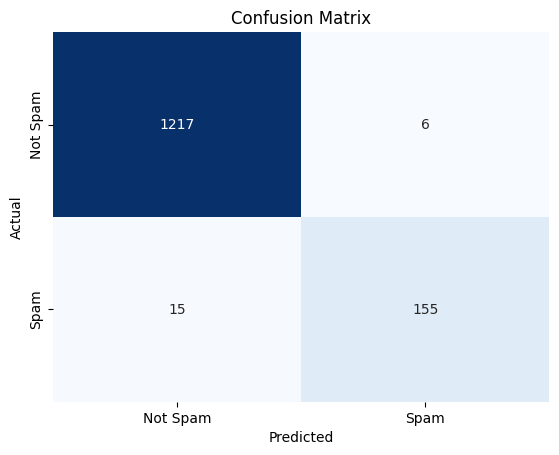

In [ ]:
# Make predictions on the test data
y_pred = classifier.predict(x_test_count)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# Show the plot
plt.show()

In [ ]:
# ANSI escape codes for text color
RED = "\033[91m"
GREEN = "\033[92m"
END_COLOR = "\033[0m"

# Upload multiple files
uploaded_files = files.upload()

# Iterate through the uploaded files
for filename, content in uploaded_files.items():
    print(f"\nFile: {filename}")

    # Print the content of the current file
    print("\nFile Content:")
    print(content.decode('utf-8'))

    # Transform the test email using the same vectorizer
    test_email_count = vectorizer.transform([content.decode('utf-8')])

    # Predict using the trained classifier
    test_email_prediction = classifier.predict(test_email_count)

    if test_email_prediction[0] == 1:
        print(f"{RED}Spam detected!{END_COLOR}")
    else:
        print(f"{GREEN}Not spam{END_COLOR}")


Saving email1.txt to email1.txt
Saving email2.txt to email2.txt

File: email1.txt

File Content:
Subject: Meeting Confirmation

Dear Michael,

I hope this email finds you well. I am writing to confirm our scheduled meeting on November 7, 2023 at 7:00pm in Toronto. Please let me know if there are any changes or if you have any specific agenda items you'd like to cover during the meeting.

Looking forward to our discussion.

Best regards,
Trevor Phillips
Not spam

File: email2.txt

File Content:
Subject: Urgent Action Needed

Dear Michael,

 We have detected suspicious activity on your Wells Fargo account. Log in at [Link] to update your account preferences and protect your information.

Best regards,
Bank
Spam detected!
